In [27]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 

In [48]:
from statsmodels.tsa.stattools import acf, pacf
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.stats.diagnostic import acorr_ljungbox
from statsmodels.tsa.stattools import adfuller, kpss
from statsmodels.tsa.api import Holt
from sklearn.metrics import mean_absolute_error,mean_absolute_percentage_error, mean_squared_error

In [29]:
from pmdarima import auto_arima
from statsmodels.tsa.arima.model import ARIMA

<AxesSubplot:>

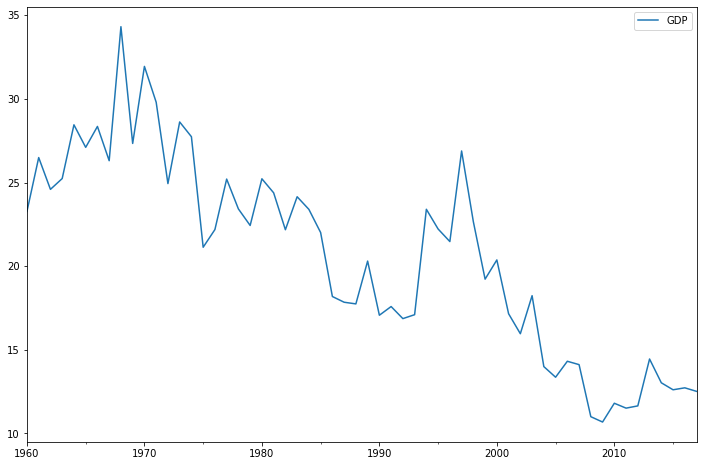

In [30]:
df=pd.read_pickle('CAGDP.pkl') # data are stored in '*****.pkl' file
plt.rc("figure", figsize=(12,8))
df.plot()

<AxesSubplot:>

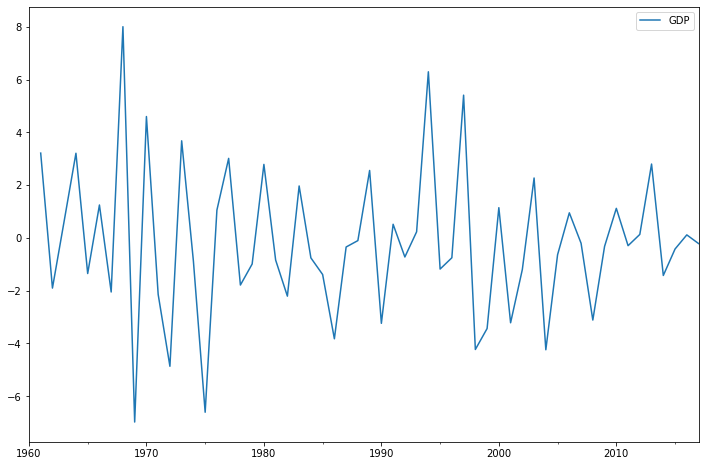

In [31]:
df.diff().plot()

### Testing stationarity

In [32]:
adfuller(df.diff().dropna())

(-4.429239253893266,
 0.0002633936115093637,
 2,
 54,
 {'1%': -3.55770911573439,
  '5%': -2.9167703434435808,
  '10%': -2.59622219478738},
 198.42874734410242)

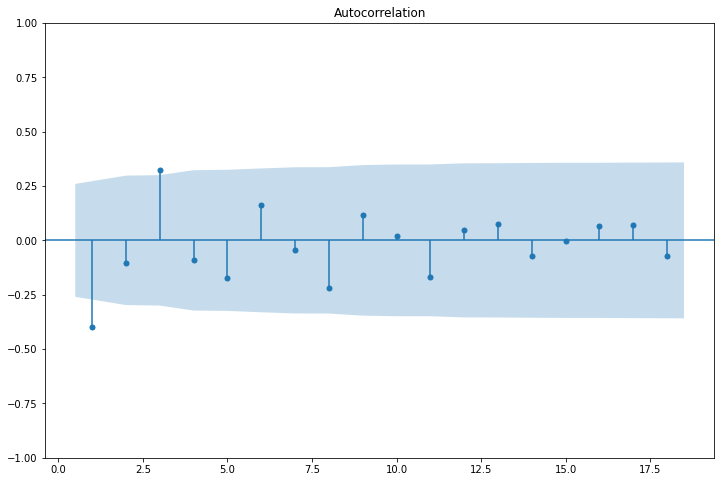

In [33]:
plot_acf(df.diff().dropna(), zero = False); # ARIMA(0, 1, 3)

C:\Users\Rudy\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


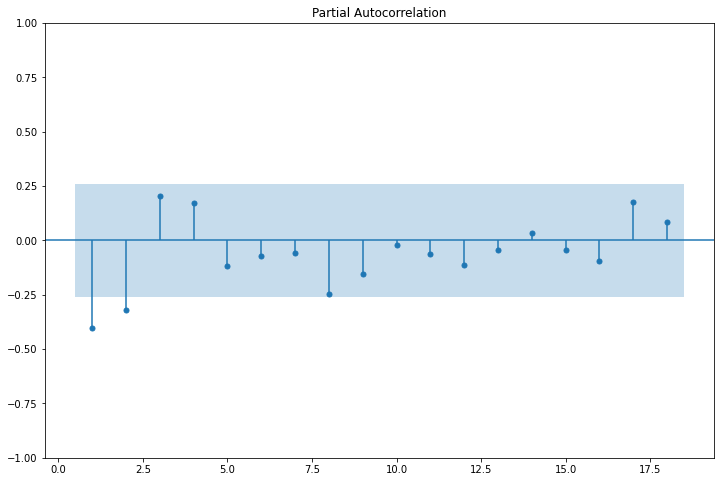

In [34]:
plot_pacf(df.diff().dropna(), zero = False); # ARIMA(2, 1, 0)

In [35]:
n = 5
train = df.iloc[:-n]
test = df.iloc[-n:]
start = len(train)
end = start + len(test) - 1

### ARIMA(2, 1, 0) model

In [36]:
model1 = ARIMA(train, order = (2, 1, 0)).fit()
predict1 = model1.predict(start = start, end = end).rename('ARIMA(2,1,0) predict')
model1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                    GDP   No. Observations:                   53
Model:                 ARIMA(2, 1, 0)   Log Likelihood                -124.308
Date:                Mon, 11 Apr 2022   AIC                            254.616
Time:                        21:53:09   BIC                            260.470
Sample:                    12-31-1960   HQIC                           256.860
                         - 12-31-2012                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.5063      0.159     -3.190      0.001      -0.817      -0.195
ar.L2         -0.2878      0.161     -1.792      0.073      -0.603       0.027
sigma2         6.9354      1.305      5.316      0.000       4.378       9.492
===================================================================================
Ljung-Box (L1) (Q):                   0.05   Jarque-Bera (JB):                 4.55
Prob(Q):                              0.82   Prob(JB):                         0.10
Heteroskedasticity (H):               0.55   Skew:                             0.60
Prob(H) (two-sided):                  0.22   Kurtosis:                         3.81
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

### ARIMA(0, 1, 3) model

In [37]:
model2 = ARIMA(train, order = (0, 1, 3)).fit()
predict2 = model2.predict(start = start, end = end).rename('ARIMA(0, 1, 3) predict')
model2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                    GDP   No. Observations:                   53
Model:                 ARIMA(0, 1, 3)   Log Likelihood                -122.994
Date:                Mon, 11 Apr 2022   AIC                            253.989
Time:                        21:53:09   BIC                            261.794
Sample:                    12-31-1960   HQIC                           256.981
                         - 12-31-2012                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1         -0.4588      0.128     -3.581      0.000      -0.710      -0.208
ma.L2          0.0938      0.149      0.631      0.528      -0.198       0.385
ma.L3          0.2845      0.139      2.042      0.041       0.011       0.558
sigma2         6.5642      1.295      5.070      0.000       4.027       9.102
===================================================================================
Ljung-Box (L1) (Q):                   0.10   Jarque-Bera (JB):                 1.83
Prob(Q):                              0.75   Prob(JB):                         0.40
Heteroskedasticity (H):               0.54   Skew:                             0.39
Prob(H) (two-sided):                  0.21   Kurtosis:                         3.47
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [38]:
auto_arima(df, seasonal = False, trace = True).summary()

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=275.378, Time=0.09 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=286.810, Time=0.01 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=278.944, Time=0.03 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=276.821, Time=0.03 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=285.052, Time=0.01 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=277.980, Time=0.08 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=276.285, Time=0.06 sec
 ARIMA(3,1,2)(0,0,0)[0] intercept   : AIC=inf, Time=0.25 sec
 ARIMA(2,1,3)(0,0,0)[0] intercept   : AIC=inf, Time=0.32 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=278.361, Time=0.03 sec
 ARIMA(1,1,3)(0,0,0)[0] intercept   : AIC=inf, Time=0.26 sec
 ARIMA(3,1,1)(0,0,0)[0] intercept   : AIC=276.710, Time=0.06 sec
 ARIMA(3,1,3)(0,0,0)[0] intercept   : AIC=inf, Time=0.49 sec
 ARIMA(2,1,2)(0,0,0)[0]             : AIC=274.197, Time=0.09 sec
 ARIMA(1,1,2)(0,0,0)[0]             : AIC=276.511, Time=0.06 se

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                   58
Model:               SARIMAX(2, 1, 2)   Log Likelihood                -132.098
Date:                Mon, 11 Apr 2022   AIC                            274.197
Time:                        21:53:12   BIC                            284.412
Sample:                             0   HQIC                           278.167
                                 - 58                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.6740      0.202     -3.329      0.001      -1.071      -0.277
ar.L2         -0.7141      0.196     -3.637      0.000      -1.099      -0.329
ma.L1          0.2468      0.216      1.141      0.254      -0.177       0.671
ma.L2          0.4831      0.315      1.531      0.126      -0.135       1.101
sigma2         5.9653      0.994      6.003      0.000       4.018       7.913
===================================================================================
Ljung-Box (L1) (Q):                   0.12   Jarque-Bera (JB):                 6.72
Prob(Q):                              0.73   Prob(JB):                         0.03
Heteroskedasticity (H):               0.35   Skew:                             0.63
Prob(H) (two-sided):                  0.03   Kurtosis:                         4.10
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

### ARIMA(2, 1, 2) model

In [39]:
model3 = ARIMA(train, order = (2, 1, 2)).fit()
predict3 = model3.predict(start = start, end = end).rename('ARIMA(2,1,2) predict')
model3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                    GDP   No. Observations:                   53
Model:                 ARIMA(2, 1, 2)   Log Likelihood                -122.498
Date:                Mon, 11 Apr 2022   AIC                            254.996
Time:                        21:53:12   BIC                            264.752
Sample:                    12-31-1960   HQIC                           258.737
                         - 12-31-2012                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.6746      0.240     -2.806      0.005      -1.146      -0.203
ar.L2         -0.6885      0.230     -2.989      0.003      -1.140      -0.237
ma.L1          0.2371      0.250      0.950      0.342      -0.252       0.727
ma.L2          0.4454      0.385      1.156      0.248      -0.310       1.201
sigma2         6.4377      1.167      5.517      0.000       4.151       8.725
===================================================================================
Ljung-Box (L1) (Q):                   0.10   Jarque-Bera (JB):                 5.61
Prob(Q):                              0.76   Prob(JB):                         0.06
Heteroskedasticity (H):               0.44   Skew:                             0.66
Prob(H) (two-sided):                  0.10   Kurtosis:                         3.92
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

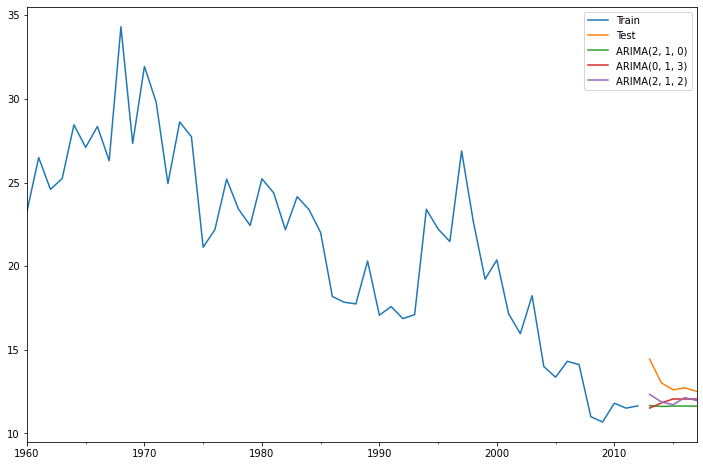

In [40]:
ax = train.plot()
test.plot(ax = ax)
predict1.plot(ax = ax)
predict2.plot(ax = ax)
predict3.plot(ax = ax)
plt.legend(['Train', 'Test', 'ARIMA(2, 1, 0)', 'ARIMA(0, 1, 3)', 'ARIMA(2, 1, 2)'])

In [41]:
mean_absolute_percentage_error(test, predict1)

0.1068936456764092

In [42]:
mean_absolute_percentage_error(test, predict2)

0.08566409969965783

In [43]:
mean_absolute_percentage_error(test, predict3)

0.07886852745894105

### Mean absolute square error to test if our model is better than naive forecasting

In [44]:
def mase(train, test, predict):
    num = mean_absolute_error(test, predict)
    den = np.mean(np.abs(np.diff(train)))
    return num / den

In [45]:
mase(train['GDP'], test['GDP'], predict1)

0.6199059698275984

In [46]:
mase(train['GDP'], test['GDP'], predict2)

0.5047419007441464

In [47]:
mase(train['GDP'], test['GDP'], predict3)

0.45818723109402215

In [49]:
modelHolt = Holt(train).fit()
predictHolt = modelHolt.forecast(len(test)).rename("Holt's predict")

In [51]:
mean_absolute_percentage_error(test, predictHolt)

0.18511091671180174

In [52]:
mase(train['GDP'], test['GDP'], predictHolt)

1.0556615996470222

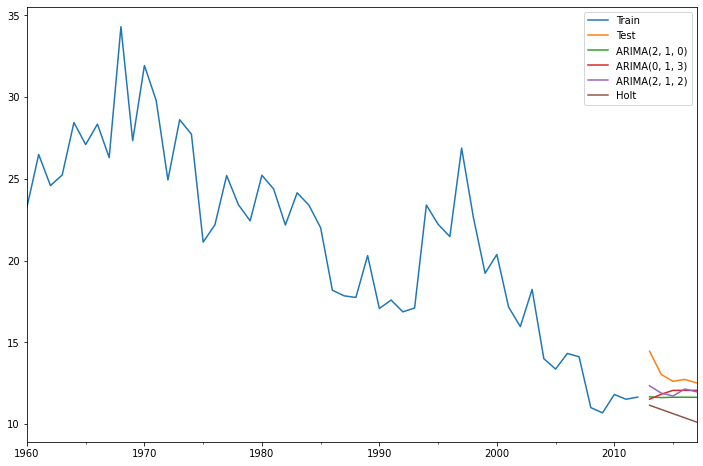

In [55]:
ax = train.plot()
test.plot(ax = ax)
predict1.plot(ax = ax)
predict2.plot(ax = ax)
predict3.plot(ax = ax)
predictHolt.plot(ax = ax)
plt.legend(['Train', 'Test', 'ARIMA(2, 1, 0)', 'ARIMA(0, 1, 3)', 'ARIMA(2, 1, 2)', 'Holt'])

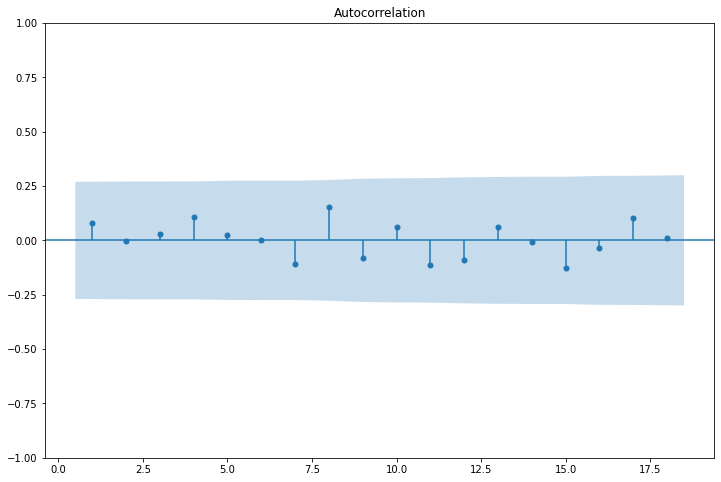

In [56]:
plot_acf(model3.resid, zero = False);